# Support Vector Regression (SVR)

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
dataset=pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [3]:
print (X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print (y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
#converting y row to coloumn
y= y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X =StandardScaler()
sc_y=StandardScaler()
X =sc_X.fit_transform(X)
y =sc_y.fit_transform(y)

In [7]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [9]:
#Training the SVR model on the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [10]:
#Predict a new result
#Since the values of X and y were scaled so using 6.5 directly won't work.hence we need to feauture scale 6.5
regressor.predict(sc_X.transform([[6.5]]))

array([-0.27861589])

In [11]:
#reversing the scaled predicted value
#Use of inverse transform method
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

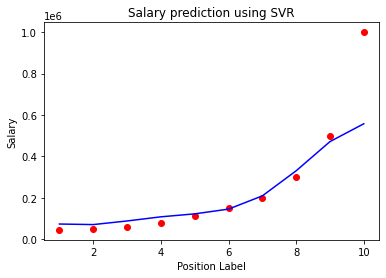

In [12]:
#Visualising the SVR result
#inversing the scaled values
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)),color='blue')
plt.title('Salary prediction using SVR')
plt.xlabel('Position Label')
plt.ylabel('Salary')
plt.show()

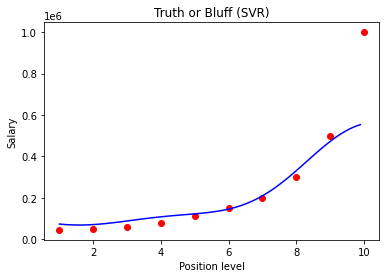

In [13]:
#Visualising the SVR results(for higher resolution and smoother curve)
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()